<a href="https://colab.research.google.com/github/monika-chivate/exam/blob/main/image_folder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, array_to_img
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten

In [ ]:
IMG_WIDTH=200
IMG_HEIGHT=200
batch_size=4

cat_dog_dir = r'D:\dl_assignment\kagglecatsanddogs_5340\PetImages'



In [ ]:
import matplotlib.image as mpimg
from  matplotlib import pyplot as plt
%matplotlib inline


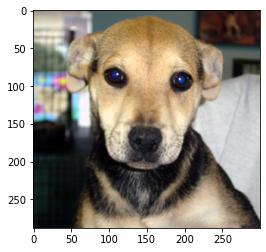

In [ ]:
test_image=r'D:\dl_assignment\kagglecatsanddogs_5340\PetImages\Dog\4.jpg'

img=  mpimg.imread(test_image)
plt.imshow(img)

In [ ]:
image_gen_train = ImageDataGenerator(rescale=1./255, 
                                     zoom_range=0.2, 
                                     rotation_range=65,
                                     shear_range=0.09,
                                     horizontal_flip=True,
                                     vertical_flip=True)


In [ ]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory= cat_dog_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode = 'binary')

Found 25000 images belonging to 2 classes.


In [ ]:
from sklearn.model_selection import train_test_split
(trainX, testX) = train_test_split(train_data_gen, test_size=0.2)

UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x000001F631493B30>

In [ ]:
train_data_gen

In [ ]:
train_data_gen.class_indices.keys()

dict_keys(['Cat', 'Dog'])

In [ ]:
#step1-convolution
classifier=Sequential()
classifier.add(Convolution2D(32,3,3,input_shape=(200,200,3),activation='relu'))
#step2-maxpooling
classifier.add(MaxPooling2D(pool_size=(2,2)))
#step3-flattening
classifier.add(Flatten())
#step4-fullconnection
classifier.add(Dense(128,activation='relu'))
classifier.add(Dense(1,activation='softmax'))

In [ ]:
classifier.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
classifier.fit(train_data_gen,epochs =1)

2589/6250 [===========>..................] - ETA: 11:59 - loss: 0.6691 - accuracy: 0.4997

UnknownError:  UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x000001D94525E180>
Traceback (most recent call last):

  File "C:\Users\monik\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\ops\script_ops.py", line 275, in __call__
    ret = func(*args)

  File "C:\Users\monik\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\autograph\impl\api.py", line 649, in wrapper
    return func(*args, **kwargs)

  File "C:\Users\monik\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\data\ops\dataset_ops.py", line 992, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))

  File "C:\Users\monik\AppData\Roaming\Python\Python38\site-packages\keras\engine\data_adapter.py", line 834, in wrapped_generator
    for data in generator_fn():

  File "C:\Users\monik\AppData\Roaming\Python\Python38\site-packages\keras\engine\data_adapter.py", line 960, in generator_fn
    yield x[i]

  File "C:\Users\monik\AppData\Local\Programs\Python\Python38\lib\site-packages\keras_preprocessing\image\iterator.py", line 65, in __getitem__
    return self._get_batches_of_transformed_samples(index_array)

  File "C:\Users\monik\AppData\Local\Programs\Python\Python38\lib\site-packages\keras_preprocessing\image\iterator.py", line 227, in _get_batches_of_transformed_samples
    img = load_img(filepaths[j],

  File "C:\Users\monik\AppData\Local\Programs\Python\Python38\lib\site-packages\keras_preprocessing\image\utils.py", line 114, in load_img
    img = pil_image.open(io.BytesIO(f.read()))

  File "C:\Users\monik\AppData\Local\Programs\Python\Python38\lib\site-packages\PIL\Image.py", line 3008, in open
    raise UnidentifiedImageError(

PIL.UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x000001D94525E180>


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]] [Op:__inference_train_function_7740]